# MoniePoint
## Project:- Customer Financial Status Assessment for Loan Approval.

 This project is forcused on customers that applied for loan and the customers whose loan request will get approved.
    
The guideline to follow while building the model is.
* Customers who are verified user of moniepoint services.
* Customers whose credit score is above 700.

**model to use**

K-Means clustering model will be use as the means of assessing the financial status of potential customsers seeking loan approval. The objective is to group customers into clusters based on their financial attribute. 

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

### wrangle function.
creating a wrangle function to store the clear data.

In [378]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    df.dropna(inplace=True)
    
    df = df[df['Verification_Status'] == 'Verified']
    
    credit = df['Credit Score'] >= 700
    
    low, high = df['Annual_Income'].quantile([0.1, 0.9])
    
    mask = df['Annual_Income'].between(low, high)
    
    df = df[credit & mask]
    
    return df

### Reading the data into a dataframe by using pandas from the wrangle function.

In [379]:
df = wrangle(r"C:\Users\gbest\Desktop\Customer_Financial_Status.csv")
df.dropna(inplace=True)
print(df.shape)
df.tail()

(2001, 12)


,User_id,Loaner_id,Gender,Loan_Amount,Annual_Income,Credit Score,Verification_Status,Years_in_Current_Job/Business,Home_Owership,Age,Country,Education_Level
5639,895586,1116137,Male,37318,193762,731,Verified,4,Rent,35,Nigeria,Bachelor's
5641,980230,1203405,Male,26835,121676,747,Verified,6,Rent,50,Nigeria,High School
5646,980209,1203381,Female,54725,117211,700,Verified,1,Rent,33,Nigeria,Masters
5647,979302,1202382,Male,64092,145369,748,Verified,5,Rent,37,Nigeria,High School
5648,980215,1203389,Male,10828,121562,742,Verified,8,Home Mortgage,40,Nigeria,High School


### Exploratory Data Analysis(EDA).

Going through each features in the dataset to get more information about the dataset.

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2502 entries, 0 to 5648
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   User_id                        2502 non-null   int64 
 1   Loaner_id                      2502 non-null   int64 
 2   Gender                         2502 non-null   object
 3   Loan_Amount                    2502 non-null   int64 
 4   Annual_Income                  2502 non-null   int64 
 5   Credit Score                   2502 non-null   int64 
 6   Verification_Status            2502 non-null   object
 7   Years_in_Current_Job/Business  2502 non-null   int64 
 8   Home_Owership                  2502 non-null   object
 9   Age                            2502 non-null   int64 
 10  Country                        2502 non-null   object
 11  Education_Level                2502 non-null   object
dtypes: int64(7), object(5)
memory usage: 254.1+ KB


In [351]:
df['Gender'].value_counts(normalize=True)

Male      0.638681
Female    0.361319
Name: Gender, dtype: float64

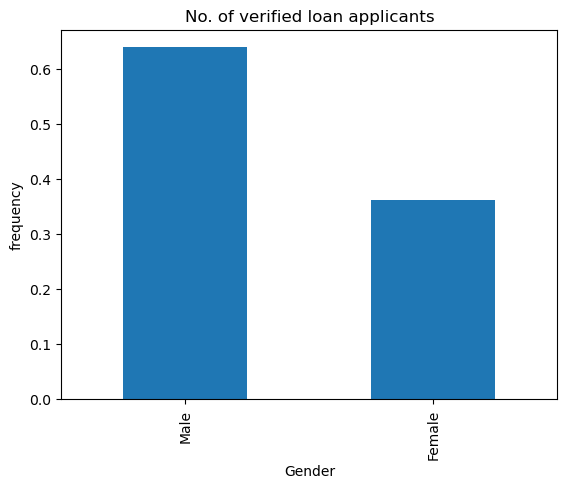

In [353]:
df['Gender'].value_counts(normalize=True).plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('frequency')
plt.title('No. of verified loan applicants');

**Gender**

The data show that.
* 63.8% of the loan applicant are `Male` and.
* 36.1% of the laon applicant are `Female`

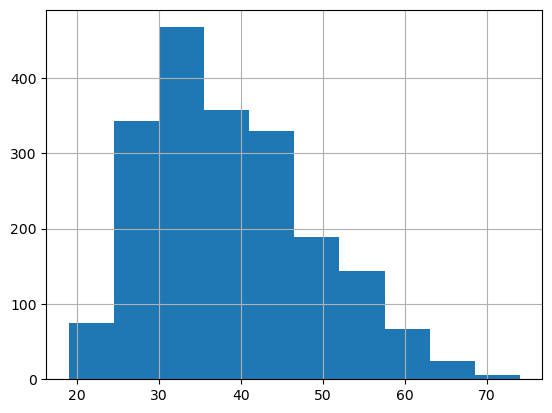

In [398]:
df['Age'].hist();

**Age**

* the data shows that applicant from mid 20's to mid 40's applied for for loan more and.
* Age from early 30's to mid 30's have more individual who apply for loan than any other age in the data.

In [356]:
(df['Years_in_Current_Job/Business'].sort_values().value_counts(normalize=True) * 100).round(2)

10    33.28
1     15.29
3      8.70
2      7.90
5      7.80
7      6.50
8      6.00
4      5.70
6      4.85
9      4.00
Name: Years_in_Current_Job/Business, dtype: float64

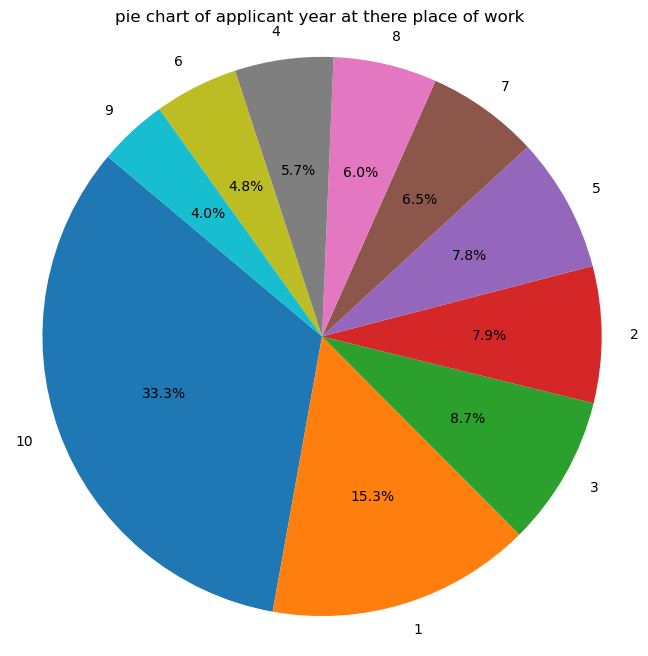

In [357]:
job = df['Years_in_Current_Job/Business'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(job, labels=job.index, autopct='%1.1f%%', startangle=140)
plt.title(f"pie chart of applicant year at there place of work")
plt.axis('equal')
plt.show();

**Years_in_Current_Job/Business**

Here `pie chart` was used to visualize the years that the loan appliacants have spend in their current jobs or businesses.
* from the data above individual who have spent `10 and above` in there place of work/business applied for loan more than other with 33.28%.
* followed by individual that are have spend `a year and below` at there current place of work/business with 15.3%.
* others are below 10%.

In [358]:
df['Home_Owership'].value_counts(normalize=True)

Home Mortgage    0.495752
Rent             0.421789
Own Home         0.082459
Name: Home_Owership, dtype: float64

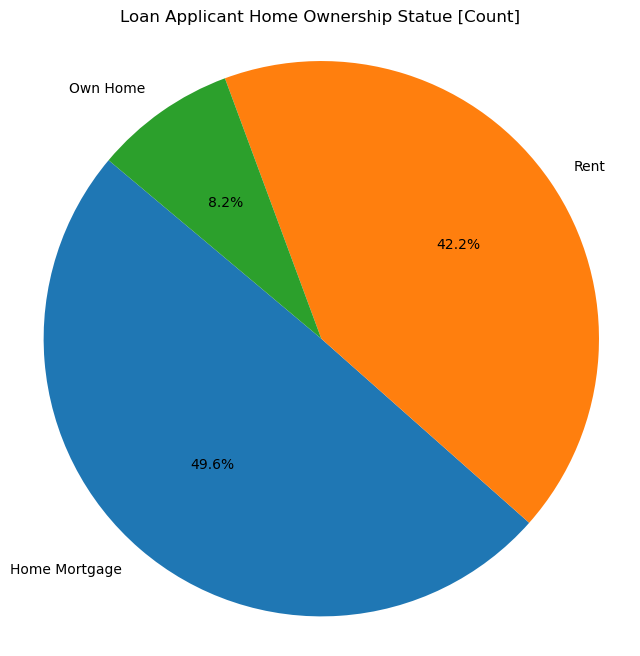

In [359]:
ownership = df['Home_Owership'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(ownership, labels=ownership.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Loan Applicant Home Ownership Statue [Count]")
plt.axis('equal')
plt.show();

**Home_Owership**

* 49.6% of the individual who applied for loan are living in a `Mortgaged Home`
* 42.2% of the individual who applied for loan are living in a `Rented Apartment`
* While 8.2% of the individual who applied for loan are living in a `House they Owned`

In [360]:
df["Education_Level"].value_counts()

Bachelor's     813
High School    720
Masters        449
Ph.D            19
Name: Education_Level, dtype: int64

In [363]:
educ = (
    df["Education_Level"]
    .groupby(df["Verification_Status"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
educ.round(2)

,Verification_Status,Education_Level,frequency
0,Verified,Bachelor's,0.41
1,Verified,High School,0.36
2,Verified,Masters,0.22
3,Verified,Ph.D,0.01


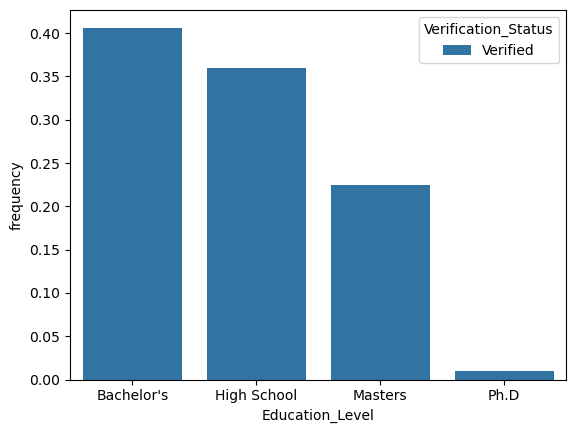

In [362]:
sns.barplot(
    x="Education_Level",
    y="frequency",
    hue="Verification_Status",
    data=educ
);

**Education_Level**

* `41%` of the applicant have a `Bachelor's Degree`.
* `36%` of the applicant have a `High School Certifcate`.
* `22%` of the applicant have a `Masters Degree`.
* `1%` of the applicant have `Ph.D`.

In [261]:
df['Annual_Income'].describe().apply("{0:,.0f}".format)

count        2,502
mean     1,370,413
std        853,858
min        163,894
25%        848,298
50%      1,166,552
75%      1,665,930
max      9,338,880
Name: Annual_Income, dtype: object

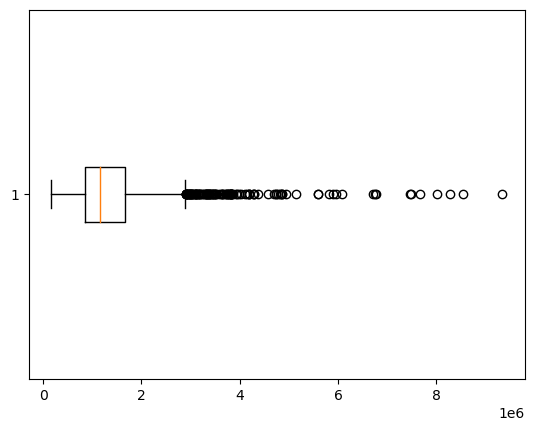

In [231]:
plt.boxplot(df['Annual_Income'], vert=False);

**Annual_Income**

**Note:-** Going through the `Annual Income column` we noticed that it has `outlier` and this could affect the performance of the model that we want to build, so we need to remove the outlier in the annual income column before building the model.
* The code to remove the outlier  will be written in the wrangle function above!!!

In [288]:
df['Annual_Income'].describe().apply("{0:,.0f}".format)

count        2,001
mean     1,242,166
std        413,335
min        619,932
25%        914,888
50%      1,164,795
75%      1,530,545
max      2,295,732
Name: Annual_Income, dtype: object

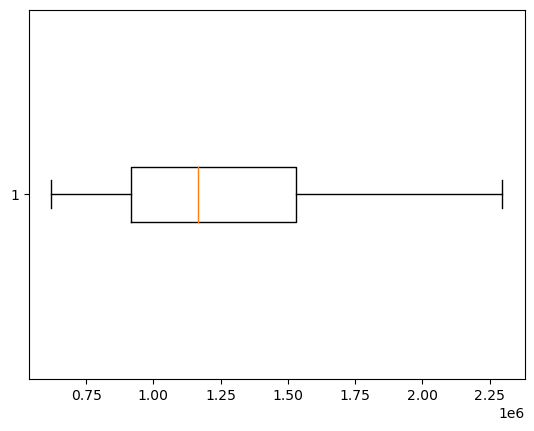

In [289]:
plt.boxplot(df['Annual_Income'], vert=False);

<AxesSubplot:>

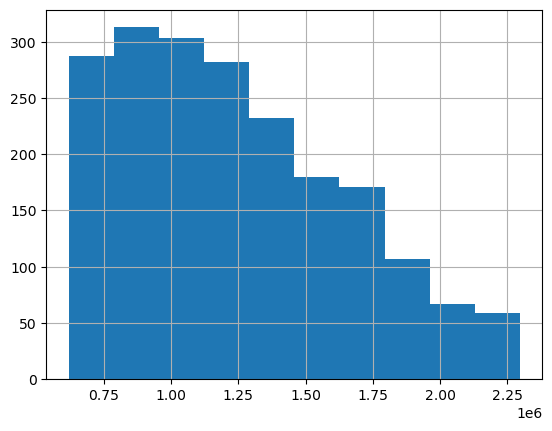

In [290]:
df['Annual_Income'].hist()

before model building we need to the features to use for building the model, these can be done by looking at the `correlation(relationship)` between the `Numerical columns` and we saw that the `Annual Income` and the `Loan Amount` has more in common, we are going to use the the two columns in building the model.

In [327]:
mask = ["Loan_Amount", "Annual_Income", "Credit Score"]
corr = df[mask].corr()
corr.style.background_gradient(axis=None)

,Loan_Amount,Annual_Income,Credit Score
Loan_Amount,1.000000,0.390629,-0.016361
Annual_Income,0.390629,1.000000,-0.019259
Credit Score,-0.016361,-0.019259,1.000000


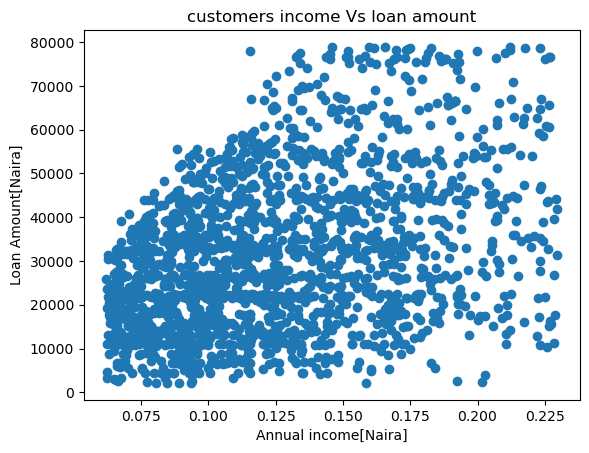

In [328]:
plt.scatter(
    x=df['Annual_Income']/1e6, 
    y=df['Loan_Amount']
)
plt.xlabel('Annual income[Naira]')
plt.ylabel('Loan Amount[Naira]')
plt.title('customers income Vs loan amount');

## Building the K-Means model.

In [380]:
X = df[['Annual_Income','Loan_Amount']]
print(X.shape)
X.head()

(2001, 2)


,Annual_Income,Loan_Amount
0,207411,61131
3,78008,17624
8,203151,26628
11,66956,17228
14,224511,34661


In [381]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

the model have been built and the number of clusters was set to `3`, which mean that the model will create three groups of data point.

In [386]:
labels = model.labels_
labels[-5:]

array([1, 0, 0, 0, 0])

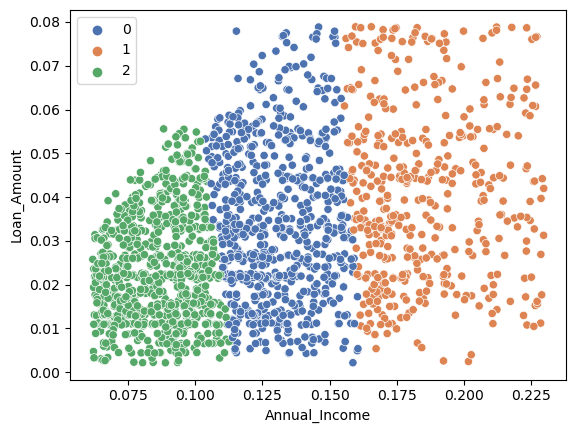

In [387]:
sns.scatterplot(
    x=df["Annual_Income"]/1e6, 
    y=df["Loan_Amount"]/1e6,
    hue=labels,
    palette="deep"
);

* as seen above, the diagram shows three different groups and every applicant who verified and have a credit score of over 700 are in one of these group

In [333]:
centroids =  model.cluster_centers_
centroids

array([[130305.86713287,  33946.8027972 ],
       [185399.62168142,  40888.09292035],
       [ 85836.04196643,  23181.05995204]])

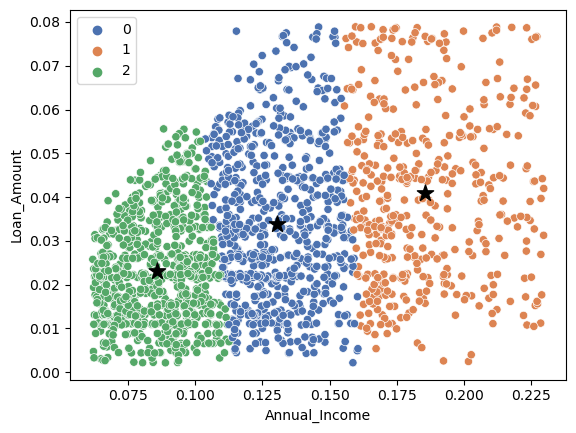

In [334]:
sns.scatterplot(
    x=df["Annual_Income"]/1e6, 
    y=df["Loan_Amount"]/1e6,
    hue=labels,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0]/1e6,
    y=centroids[:, 1]/1e6,
    color="black",
    marker="*",
    s=150
);

centroid was added to get the `Avarage point`of every cluster in the data.

**Note**

We need to know the maximum number of cluster to use to `fine tune` our model and still get a perfectly working model, for this the `elbow method` will be use to get the maximum number of clusters that we could use for the model.

In [367]:
n_clusters = range(2, 13)
inertia_error = []
silhouette_scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k,random_state=40)
    model.fit(X)
    inertia_error.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))
    
print("inertia:", inertia_error)
print()
print("silhouette score(3 cluster):", silhouette_scores)

inertia: [1498645280298.094, 968171314147.2903, 769172675755.9521, 626652454514.5677, 522824041679.7379, 443897464905.79443, 383020132812.6448, 342973430399.6478, 304519835976.8148, 280432452649.8788, 254832228335.70386]

silhouette score(3 cluster): [0.5272173660665717, 0.4300945536943751, 0.3712701362578551, 0.3798202381369762, 0.3673749267946841, 0.372387165965605, 0.37345074031923775, 0.36775639178126557, 0.36697283909186756, 0.3650326689179262, 0.3715485881532554]


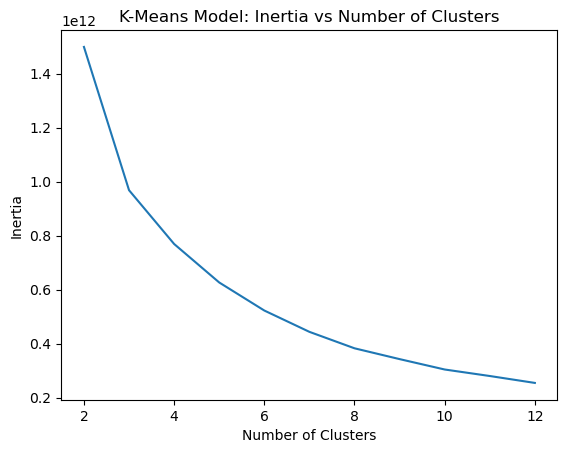

In [337]:
plt.plot(n_clusters, inertia_error)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

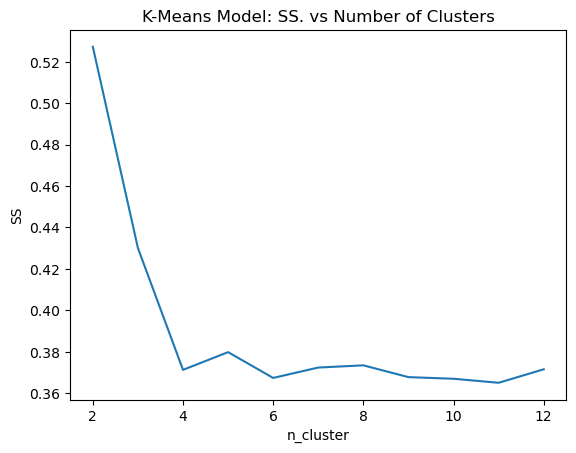

In [338]:
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("n_cluster")
plt.ylabel("SS")
plt.title("K-Means Model: SS. vs Number of Clusters");

the `Elbow Method` show that the maximum numbers of cluster that can use to fine tuning the model and still a perfectly working model, and the max number is `4`.

In [371]:
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(X)

KMeans(n_clusters=4, random_state=42)

building another model and fine tunning it base from the information we got from the `Elbow Method`

In [395]:
centroids =  final_model.cluster_centers_
centroids.round(2)

array([[ 81703.17,  21656.53],
       [154745.32,  37757.63],
       [198820.85,  43751.83],
       [116047.21,  30807.48]])

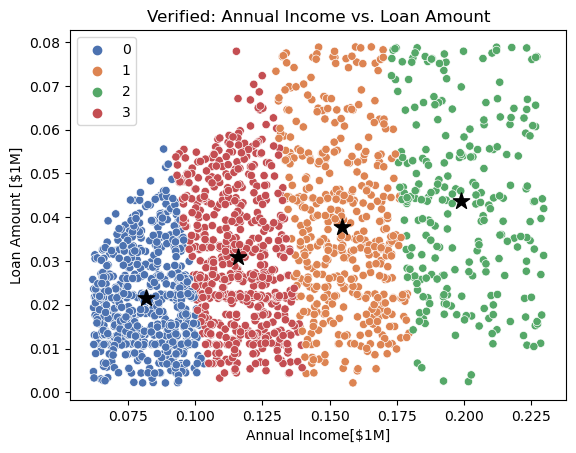

In [397]:
sns.scatterplot(
    x=df["Annual_Income"]/1e6, 
    y=df["Loan_Amount"]/1e6,
    hue=final_model.labels_,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0]/1e6,
    y=centroids[:, 1]/1e6,
    color="black",
    marker="*",
    s=150
)
plt.xlabel("Annual Income[$1M]")
plt.ylabel("Loan Amount [$1M]")
plt.title("Verified: Annual Income vs. Loan Amount");

* created another scatter plot visualization these time there are `four(4) clusters` and `four(4) centroid point.`

In [376]:
xgb = X.groupby(final_model.labels_).mean()
xgb.round(2)

,Annual_Income,Loan_Amount
0,81703.17,21656.53
1,154745.32,37757.63
2,198820.85,43751.83
3,116047.21,30807.48


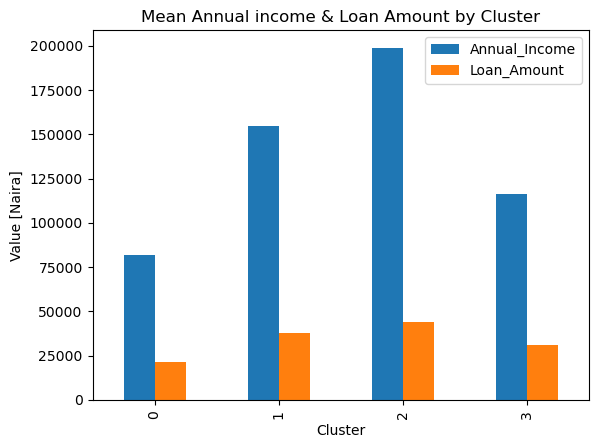

In [374]:
(xgb).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [Naira]")
plt.title("Mean Annual income & Loan Amount by Cluster");

The `bar chart` above show four(4) cluster from our model.

* The `First` clustser are group of individuals who on average earns upto `81,703 Naira` annually and the loan they applied or on average is upto `21,656 Naira`.
* The `Second` clustser are group of individual who on average earns upto`154,745 Naira` annually and the loan they applied on average is upto `37,000 Naira`.
* The `Third` clustser are group of individual who on average earns upto`198,820 Naira` annually and the loan they applied on average is upto `43,751 Naira`.
* The fourth clustser are group of individual who on average earns upto`116,047 Naira` annually and the loan they applied on average is upto `30,807 Naira`.